### pre understand
线性回归的解析方法
![](https://raw.githubusercontent.com/motewei/DrawingBed/main/img/线性回归的解析解.png)
![](https://raw.githubusercontent.com/motewei/DrawingBed/main/img/线性回归的解析方法.jpg)
解析解涉及大量的矩阵运算，非常耗时间和空间。  
梯度下降 is all you need


---

1. 以下关于线性回归的表述错误的是：     
   A. 线性回归中的“线性”，是指模型参数$\theta$之间不存在非线性耦合项。   
   B. 线性回归常用均方误差作为损失函数。   
   C.$f(x)=\theta_0+\theta_1/x$可以是一个线性回归得到的模型表达式。   
   D. 损失函数用于度量预测值和真实值之间的误差。  

答： C   
A. 正确。“线性”是指自变量和因变量之间的关系可以用线性方程描述（一次方程）。非线性耦合项是指不同变量或参数之间的非线性关系。线性回归的线性就是参数和对应的输入变量之间是线性的，没有非线性耦合项，如$\theta_1x^2$或$\theta_1\theta_2x_2$。  
B. 正确。MSE是线性回归常用的损失函数。  
C. 错误。线性意味着参数和变量之间的幂次是1，$\frac{1}{x}$是-1次的非线性关系。  
D. 正确。

---

2. 以下关于梯度下降的表述错误的是：    
    A. 使用梯度信息来最小化目标函数时，参数的更新方向是其梯度的负方向。   
    B. 梯度下降中设置更大的学习率就可以更快地收敛到全局最优。   
    C. 随机梯度下降是一种权衡训练速度和稳定性的方法。   
    D. 损失函数的优化目标是最小化模型在训练集上的误差。  

答:    
A. 正确。梯度方向是参数值增长最快的方向，梯度下降是负梯度方向更新参数实现下降来最小化目标函数的。  
B. 错误。较大的学习率在开始可能会加快参数更新，但是过大的学习率导致模型的参数更新大幅度发散而无法收敛，可能在最优值附近徘徊，还有可能会跳过全局最优而陷入到局部最优中，还有可能会放大噪声的影响。  
C. 不完全对。梯度下降参数过多会难以训练，随机选择参数梯度下降能加快训练速度，但是由于随机梯度下降选择的样本是单个的（或者一小批样本），会导致每次迭代只考虑了部分数据，会陷入到某些局部最小值中。小批量梯度下降是一种权衡训练速度和稳定性的方法。  
D. 不完全对。损失函数在训练时的优化目标是最小化模型在训练集上的误差，但是要同时结合验证集修正损失函数避免过拟合。

---

3. 假设在线性回归问题中，数据集有两个样本$\{x_1=(1,1,1),y_1=0\}$和$\{x_2=(0,1,2),y_2=1\}$，尝试用解析方式计算线性回归的参数$\theta$。计算中是否遇到了问题？

答：$X^{-1}X$所得的矩阵是奇异矩阵，不可逆，无法直接适用解析方式求解。

In [16]:
X = np.array([[1, 1, 1], [0, 1, 2]])
Y = np.array([[0], [1]])
X.T @ X

array([[1, 1, 1],
       [1, 2, 3],
       [1, 3, 5]])

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x_train = np.array([[1, 1, 1], [0, 1, 2]])
y_train = np.array([[0],[1]])

linreg = LinearRegression()
linreg.fit(x_train, y_train)

print('回归系数：', linreg.coef_, linreg.intercept_)
y_pred = linreg.predict(x_train)

rmse_loss = np.sqrt(np.square(y_pred - y_train).mean())
print('RMSE:', rmse_loss)

回归系数： [[-0.5  0.   0.5]] [0.]
RMSE: 1.415262216750919e-16


---

4. 针对 1 维线性回归问题，基于数据  
   $\{(0.1,0.3),(0.2,0.35),(0.3,0.41),(0.4,0.48),(0.5,0.54)\}$（其中第1维为唯一特征，第2维为标签$y$），构建线性回归模型$f(x)=\theta_0+\theta_1x$，并完成以下任务：  
   1. 试作图展示均方误差和参数$\theta_0$，$\theta_1$的函数关系
   2. 并以不同的参数初始化位置和学习率，画出不同的参数学习轨迹
   3. 尝试增大学习率，观察参数学习出现的发散现象


首先，这是一个1维线性回归，相当于我们常见的$y=kx+b$的函数。不用涉及到矩阵的运算，我们用下面的代码构建线性回归模型。注意不同的学习率会学习到不同的结果，得进行调参。（0.01的学习率就会学得不好）

theta0: 0.2426092698407447
theta1: 0.5785559192142694
Predicted values:
[0.30046486 0.35832045 0.41617605 0.47403164 0.53188723]


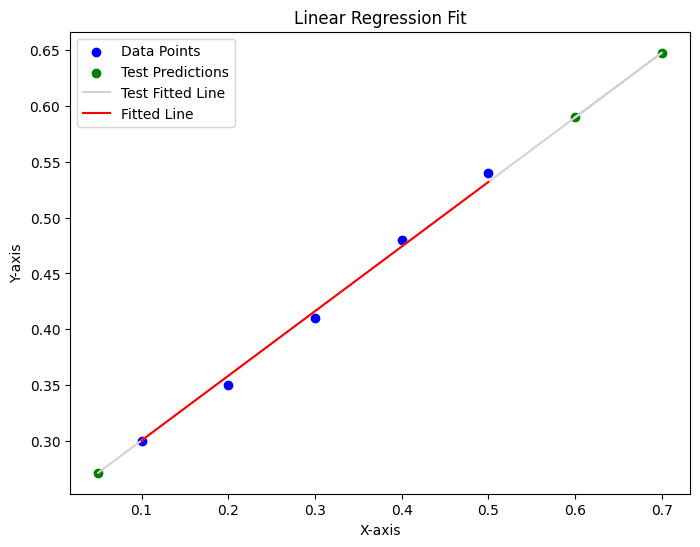

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# 数据集
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
Y = np.array([0.3, 0.35, 0.41, 0.48, 0.54])

# 参数
theta0 = 0.0
theta1 = 0.0

# 线性回归模型
def linear_regression(x, t0, t1):
    return t0 + t1 * x

# 损失函数MSE
def Loss_function(theta, X, y):
    t0, t1 = theta
    predictions = linear_regression(X, t0, t1)
    return np.sum((predictions - y) ** 2) / (2 * len(X))

# 梯度下降函数
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(X)
    for i in range(iterations):
        predictions = linear_regression(X, theta[0], theta[1])
        grad_t0 = np.sum(predictions - y) / m
        grad_t1 = np.sum((predictions - y) * X) / m
        theta[0] -= learning_rate * grad_t0
        theta[1] -= learning_rate * grad_t1
    return theta

# 学习率和迭代次数
learning_rate = 0.15
iterations = 1000

optimized_theta = gradient_descent(X, Y, [theta0, theta1], learning_rate, iterations)

print(f"theta0: {optimized_theta[0]}")
print(f"theta1: {optimized_theta[1]}")

# 使用优化后的参数进行预测
predictions = linear_regression(X, optimized_theta[0], optimized_theta[1])
print("Predicted values:")
print(predictions)

# 设置几个测试点
X_test = np.array([0.6, 0.7, 0.05])
# 使用线性回归模型预测测试点的值
predictions_test = optimized_theta[0] + optimized_theta[1] * X_test


# 可视化真实数据点和拟合直线以及测试点
# 可视化真实数据点、拟合直线和测试点
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.scatter(X_test, predictions_test, color='green', label='Test Predictions')
plt.plot(X_test, optimized_theta[0] + optimized_theta[1] * X_test, color='lightgray', label='Test Fitted Line')
plt.plot(X, optimized_theta[0] + optimized_theta[1] * X, color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


In [14]:
# 最小二乘法计算进行验证
import numpy as np

# 输入数据
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y = np.array([0.3, 0.35, 0.41, 0.48, 0.54])

# 增加一列全为1的偏置列
X_b = np.c_[np.ones((X.shape[0], 1)), X.reshape(-1, 1)]

# 使用最小二乘法求解参数
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# 打印参数
print("参数：", theta_best)

# 预测新数据
x_new = 0.6
X_new_b = np.array([[1, x_new]])
y_predict = X_new_b.dot(theta_best)
print("预测值：", y_predict[0])


参数： [0.233 0.61 ]
预测值： 0.5989999999999998


我们画图看看MSE和参数$\theta0,\theta1$的关系  
可以看出随着参数拟合到合理的范围，MSE的值比较小，在不合理的范围时，MSE的值会比较大

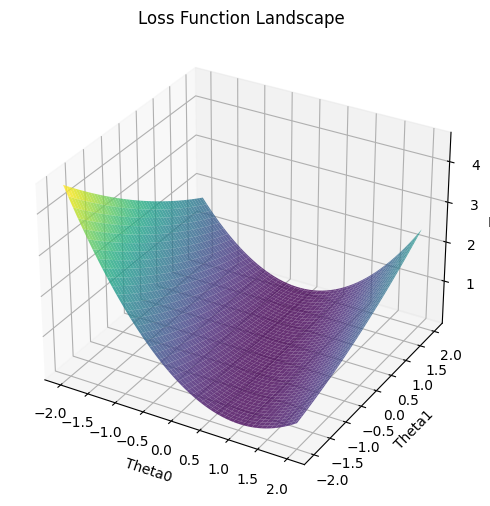

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 数据集
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
Y = np.array([0.3, 0.35, 0.41, 0.48, 0.54])

# 参数范围
theta0_range = np.linspace(-2, 2, 100)
theta1_range = np.linspace(-2, 2, 100)

# 计算损失函数的值
loss_values = np.zeros((len(theta0_range), len(theta1_range)))
for i, theta0 in enumerate(theta0_range):
    for j, theta1 in enumerate(theta1_range):
        loss_values[i, j] = np.sum((theta0 + theta1 * X - Y) ** 2) / (2 * len(X))

# 绘制3D图
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_grid, theta1_grid, loss_values.T, cmap='viridis', alpha=0.8)
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Loss')
ax.set_title('Loss Function Landscape')
plt.show()


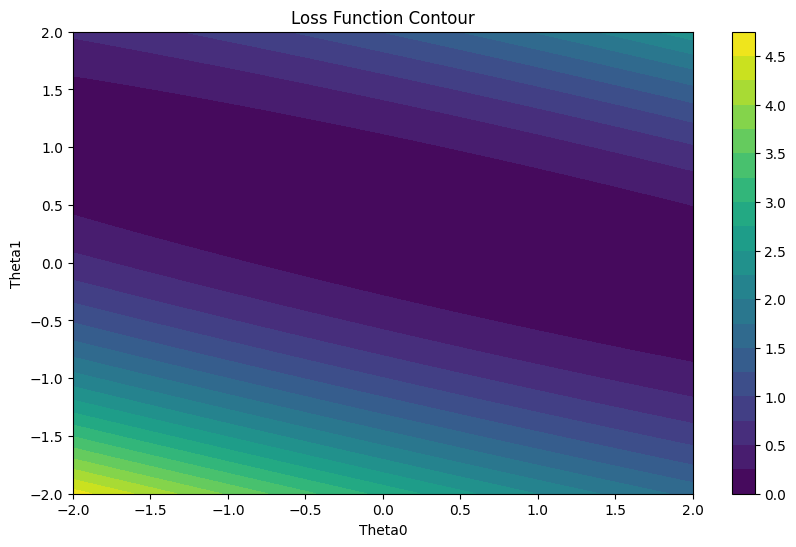

In [48]:
# 绘制填充轮廓图
plt.figure(figsize=(10, 6))
contour = plt.contourf(theta0_grid, theta1_grid, loss_values, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Loss Function Contour')
plt.show()


下面我们画图看看不同起始参数位置和学习率对参数学习轨迹的影响  
可以看到不同的初始参数位置、学习率会导致求得的“最优解”在不同的位置，同时迭代次数和速度也会有影响。学习率较大会更快收敛到最优解同时轨迹更加陡峭，学习率较小会收敛到局部最优并且轨迹比较平缓。

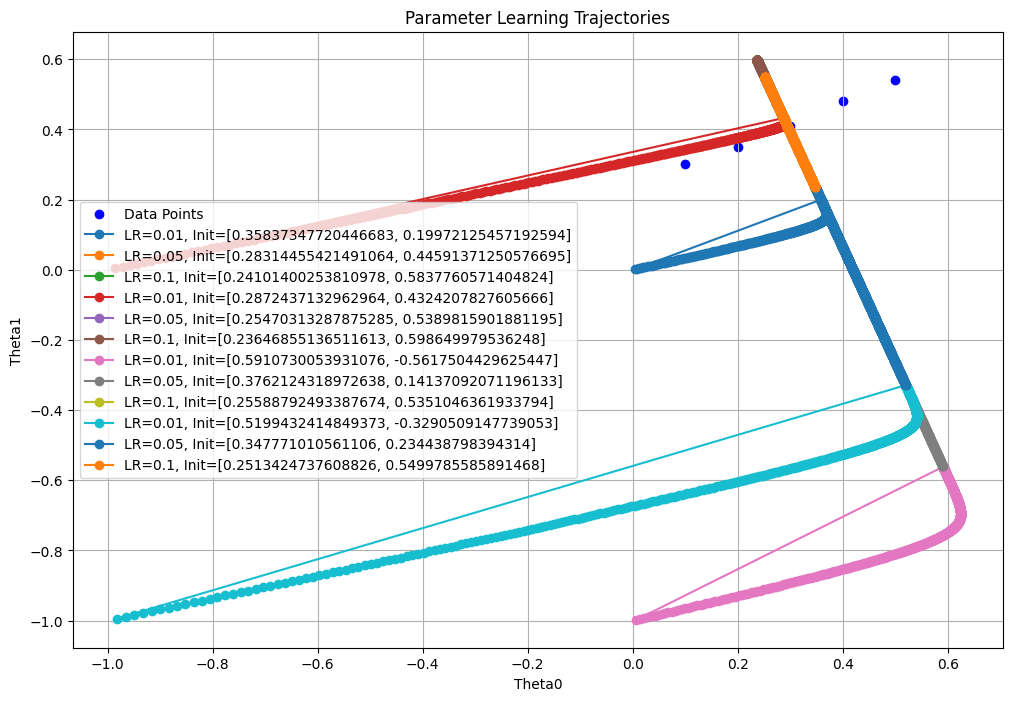

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# 数据集
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
Y = np.array([0.3, 0.35, 0.41, 0.48, 0.54])

# 损失函数MSE
def loss_function(theta, X, y):
    predictions = theta[0] + theta[1] * X
    return np.sum((predictions - y) ** 2) / (2 * len(X))

# 梯度下降函数
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(X)
    theta_history = [theta]
    
    for i in range(iterations):
        predictions = theta[0] + theta[1] * X
        grad_t0 = np.sum(predictions - y) / m
        grad_t1 = np.sum((predictions - y) * X) / m
        theta[0] -= learning_rate * grad_t0
        theta[1] -= learning_rate * grad_t1
        theta_history.append(theta.copy())
        
    return theta_history

# 不同的参数初始化位置和学习率
init_positions = [[0, 0], [-1, 0], [0, -1], [-1, -1]]  # 初始位置
learning_rates = [0.01, 0.05, 0.1]  # 学习率

# 绘制学习轨迹
plt.figure(figsize=(12, 8))
plt.scatter(X, Y, color='blue', label='Data Points')

for init_position in init_positions:
    for learning_rate in learning_rates:
        theta_history = gradient_descent(X, Y, init_position, learning_rate, iterations=1000)
        theta0_history = [theta[0] for theta in theta_history]
        theta1_history = [theta[1] for theta in theta_history]
        plt.plot(theta0_history, theta1_history, marker='o', label=f'LR={learning_rate}, Init={init_position}')

plt.title('Parameter Learning Trajectories')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.legend()
plt.grid(True)
plt.show()


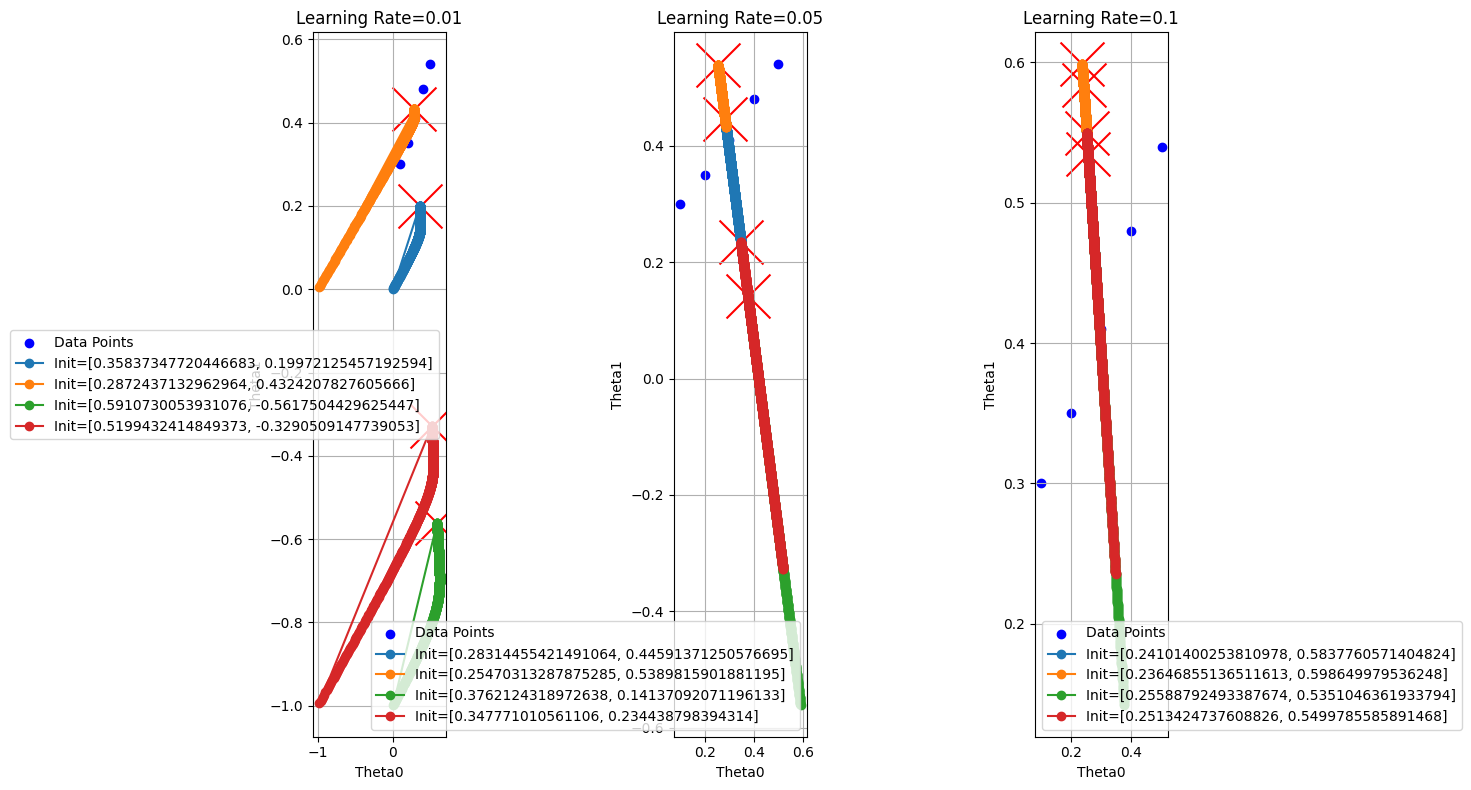

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 数据集
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
Y = np.array([0.3, 0.35, 0.41, 0.48, 0.54])

# 损失函数MSE
def loss_function(theta, X, y):
    predictions = theta[0] + theta[1] * X
    return np.sum((predictions - y) ** 2) / (2 * len(X))

# 梯度下降函数
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(X)
    theta_history = [theta]
    
    for i in range(iterations):
        predictions = theta[0] + theta[1] * X
        grad_t0 = np.sum(predictions - y) / m
        grad_t1 = np.sum((predictions - y) * X) / m
        theta[0] -= learning_rate * grad_t0
        theta[1] -= learning_rate * grad_t1
        theta_history.append(theta.copy())
        
    return theta_history

# 不同的参数初始化位置和学习率
init_positions = [[0, 0], [-1, 0], [0, -1], [-1, -1]]  # 初始位置
learning_rates = [0.01, 0.05, 0.1]  # 学习率

# 绘制学习轨迹
plt.figure(figsize=(12, 8))

for j, learning_rate in enumerate(learning_rates):
    plt.subplot(1, 3, j+1)
    plt.scatter(X, Y, color='blue', label='Data Points')

    for i, init_position in enumerate(init_positions):
        theta_history = gradient_descent(X, Y, init_position, learning_rate, iterations=1000)
        theta0_history = [theta[0] for theta in theta_history]
        theta1_history = [theta[1] for theta in theta_history]
        plt.plot(theta0_history, theta1_history, marker='o', label=f'Init={init_position}')

        # 标记每个起始位置的最终确定参数点
        final_theta = theta_history[-1]
        plt.scatter(final_theta[0], final_theta[1], color='red', marker='x', s=1000)

    plt.title(f'Learning Rate={learning_rate}')
    plt.xlabel('Theta0')
    plt.ylabel('Theta1')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


下面我们看看不同学习率对参数学习发散的影响。  
我们可以看到学习率越大参数会越快更新，前面几轮更新的幅度也比较大，是比较发散的，同时会导致参数学习到一个比较大或者比较小（更新步长太大，越过最优值的区域，导致参数越来越小或越来越大）。

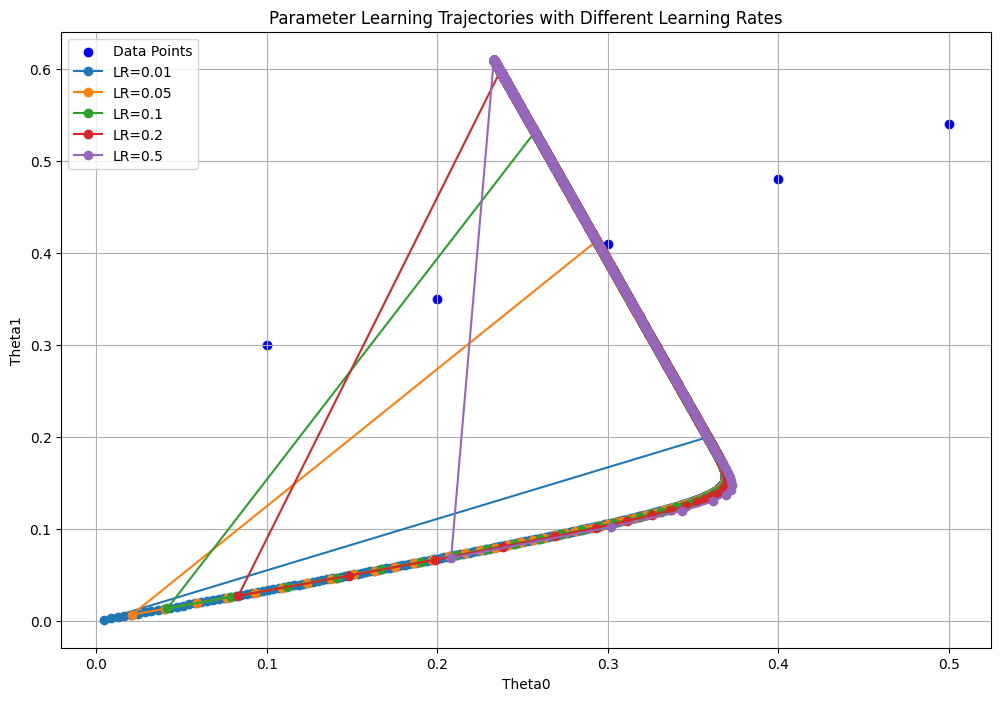

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# 数据集
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
Y = np.array([0.3, 0.35, 0.41, 0.48, 0.54])

# 梯度下降函数
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(X)
    theta_history = [theta]
    
    for i in range(iterations):
        predictions = theta[0] + theta[1] * X
        grad_t0 = np.sum(predictions - y) / m
        grad_t1 = np.sum((predictions - y) * X) / m
        theta[0] -= learning_rate * grad_t0
        theta[1] -= learning_rate * grad_t1
        theta_history.append(theta.copy())
        
    return theta_history

# 不同的学习率
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]

# 绘制学习轨迹
plt.figure(figsize=(12, 8))
plt.scatter(X, Y, color='blue', label='Data Points')

for learning_rate in learning_rates:
    theta_history = gradient_descent(X, Y, [0, 0], learning_rate, iterations=1000)
    theta0_history = [theta[0] for theta in theta_history]
    theta1_history = [theta[1] for theta in theta_history]
    plt.plot(theta0_history, theta1_history, marker='o', label=f'LR={learning_rate}')

plt.title('Parameter Learning Trajectories with Different Learning Rates')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.legend()
plt.grid(True)
plt.show()


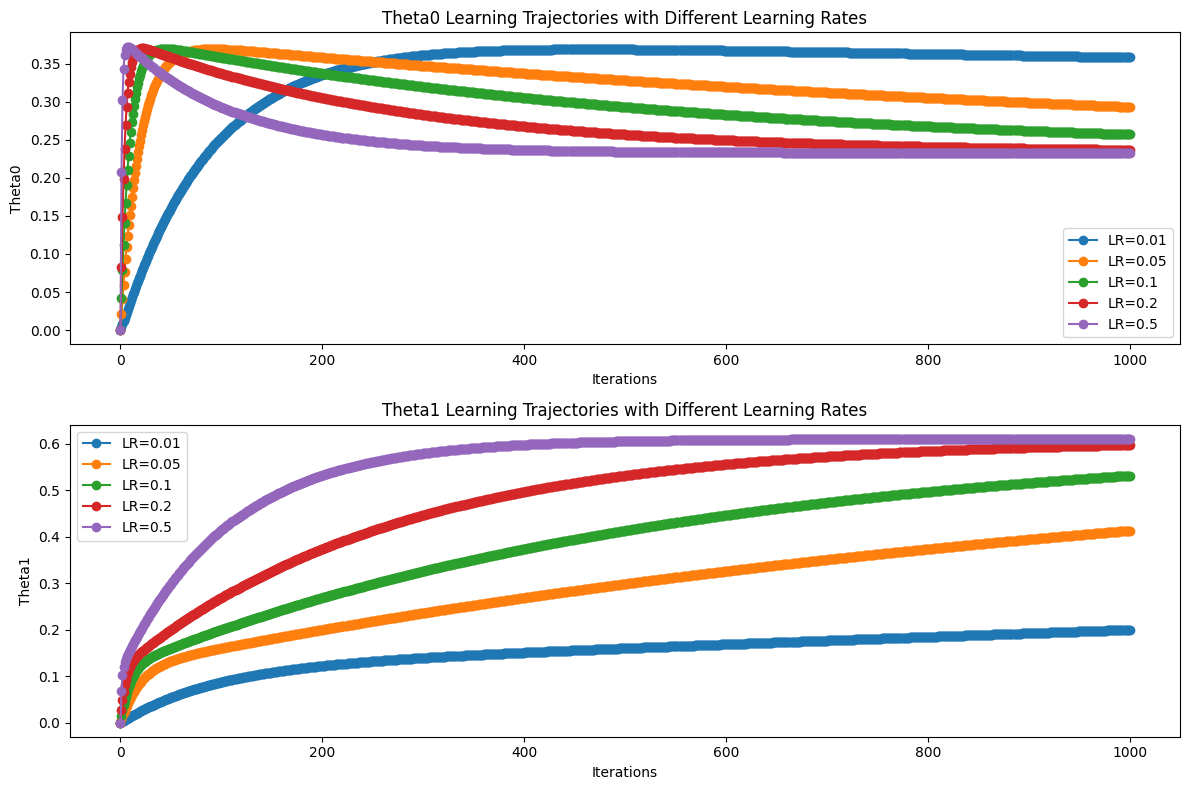

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 数据集
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
Y = np.array([0.3, 0.35, 0.41, 0.48, 0.54])

# 梯度下降函数
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(X)
    theta0_history = [theta[0]]
    theta1_history = [theta[1]]
    
    for i in range(iterations):
        predictions = theta[0] + theta[1] * X
        grad_t0 = np.sum(predictions - y) / m
        grad_t1 = np.sum((predictions - y) * X) / m
        theta[0] -= learning_rate * grad_t0
        theta[1] -= learning_rate * grad_t1
        theta0_history.append(theta[0])
        theta1_history.append(theta[1])
        
    return theta0_history, theta1_history

# 不同的学习率
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]

# 绘制学习轨迹
plt.figure(figsize=(12, 8))

# 绘制theta0的学习轨迹
plt.subplot(2, 1, 1)
plt.title('Theta0 Learning Trajectories with Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Theta0')
for learning_rate in learning_rates:
    theta0_history, _ = gradient_descent(X, Y, [0, 0], learning_rate, iterations=1000)
    plt.plot(range(len(theta0_history)), theta0_history, marker='o', label=f'LR={learning_rate}')
plt.legend()

# 绘制theta1的学习轨迹
plt.subplot(2, 1, 2)
plt.title('Theta1 Learning Trajectories with Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Theta1')
for learning_rate in learning_rates:
    _, theta1_history = gradient_descent(X, Y, [0, 0], learning_rate, iterations=1000)
    plt.plot(range(len(theta1_history)), theta1_history, marker='o', label=f'LR={learning_rate}')
plt.legend()

plt.tight_layout()
plt.show()


---

5. 调整 SGD 算法中`batch_size`的大小，观察结果的变化。对较大规模的数据集，`batch_size`过小和过大分别有什么缺点？

我们可以看到：    
较小的：更新波动比较大，训练比较不稳定，要比较多的迭代次数才能收敛。  
较大的：下降更加平滑，更加稳定，更快收敛。  
1. 过小的batch_size：    
优点： 训练速度快，内存消耗少。由于每次迭代仅使用少量样本进行参数更新，因此可以更快地进行训练，尤其是在较大的数据集上。  
缺点： 参数更新的方差大，模型收敛性能可能较差。因为每次只使用少量样本进行参数更新，导致参数的更新方向不够稳定，容易受到噪声的影响，可能导致模型收敛到局部最优解，而无法达到全局最优解。  
2. 过大的batch_size：    
优点： 参数更新的方差较小，模型收敛性能可能较好。由于每次迭代使用大量样本进行参数更新，可以减少参数更新的方差，使参数更新更加稳定，有利于模型收敛到全局最优解。  
缺点： 训练速度较慢，内存消耗较大。由于每次迭代需要处理大量样本，因此训练速度会相对较慢，并且会消耗更多的内存资源，尤其是在内存有限的情况下可能会导致内存溢出。  

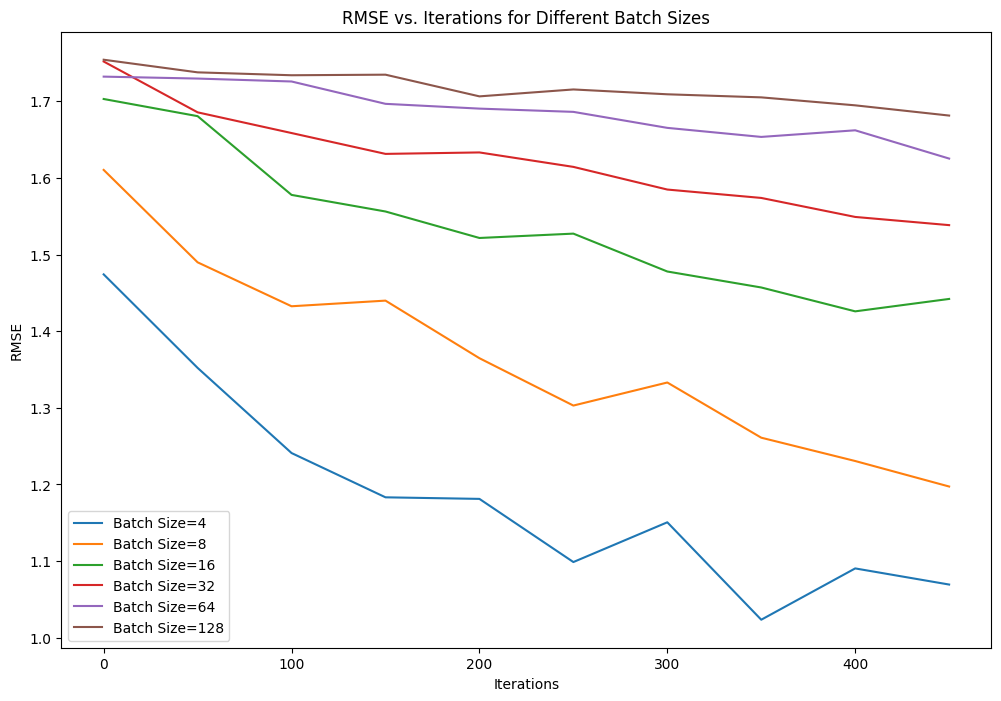

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟数据
X = np.random.rand(1000, 1)  # 1000个样本，每个样本一个特征
true_theta0 = 2.0
true_theta1 = 3.0
noise = np.random.normal(0, 1, 1000)  # 添加噪声
y = X * true_theta0 + X**2 * true_theta1 + noise  # 生成目标变量

# SGD算法
def sgd(X, y, learning_rate, batch_size, iterations):
    m = X.shape[0]
    theta0 = 0.0
    theta1 = 0.0
    for _ in range(iterations):
        indices = np.random.choice(m, batch_size, replace=True)
        X_batch = X[indices]
        y_batch = y[indices]
        predictions = theta0 + theta1 * X_batch
        grad_t0 = (predictions - y_batch).mean()
        grad_t1 = (predictions - y_batch) * X_batch.mean()
        theta0 -= learning_rate * grad_t0 / batch_size
        theta1 -= learning_rate * grad_t1 / batch_size
        rmse = np.sqrt((predictions - y_batch).var())
        yield rmse

# 不同batch_size下的RMSE
batch_sizes = [4, 8, 16, 32, 64, 128]
learning_rate = 0.05
iterations = 500

# 收集数据
window_size = 50  # 移动平均的窗口大小
rmse_data = {batch_size: [] for batch_size in batch_sizes}
for batch_size in batch_sizes:
    rmse_values = list(sgd(X, y, learning_rate, batch_size, iterations))
    rmse_data[batch_size] = [np.mean(rmse_values[i:i+window_size]) for i in range(0, iterations, window_size)]

# 绘制图表
plt.figure(figsize=(12, 8))
for batch_size in batch_sizes:
    plt.plot(range(0, iterations, window_size), rmse_data[batch_size], label=f'Batch Size={batch_size}')

plt.title('RMSE vs. Iterations for Different Batch Sizes')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()


---

6. 4.3 节 SGD 算法的代码中，我们采用了固定迭代次数的方式，但是这样无法保证程序执行完毕时迭代已经收敛，也有可能迭代早已收敛而程序还在运行。另一种方案是，如果损失函数值$M$连续次迭代都没有减小，或者减小的量小于某个预设精度$\epsilon$（例如$10^{-6}$），就终止迭代。请实现该控制方案，并思考它和固定迭代次数之间的利弊。能不能将这两种方案同时使用呢？

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler

# 从源文件加载数据，并输出查看数据的各项特征
lines = np.loadtxt('../USA_Housing.csv', delimiter=',', dtype='str')
header = lines[0]
lines = lines[1:].astype(float)
print('数据特征：', ', '.join(header[:-1]))
print('数据标签：', header[-1])
print('数据总条数：', len(lines))

# 划分训练集与测试集
ratio = 0.8
split = int(len(lines) * ratio)
np.random.seed(0)
lines = np.random.permutation(lines)
train, test = lines[:split], lines[split:]

# 数据归一化
scaler = StandardScaler()
scaler.fit(train) # 只使用训练集的数据计算均值和方差
train = scaler.transform(train)
test = scaler.transform(test)

# 划分输入和标签
x_train, y_train = train[:, :-1], train[:, -1].flatten()
x_test, y_test = test[:, :-1], test[:, -1].flatten()

数据特征： Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population
数据标签： Price
数据总条数： 5000


In [2]:
# 在X矩阵最后添加一列1，代表常数项
X = np.concatenate([x_train, np.ones((len(x_train), 1))], axis=-1)
# @ 表示矩阵相乘，X.T表示矩阵X的转置，np.linalg.inv函数可以计算矩阵的逆
theta = np.linalg.inv(X.T @ X) @ X.T @ y_train
print('回归系数：', theta)

# 在测试集上使用回归系数进行预测
X_test = np.concatenate([x_test, np.ones((len(x_test), 1))], axis=-1)
y_pred = X_test @ theta

# 计算预测值和真实值之间的RMSE
rmse_loss = np.sqrt(np.square(y_test - y_pred).mean())
print('RMSE：', rmse_loss)

回归系数： [ 6.50881254e-01  4.67222833e-01  3.38466198e-01  6.17275856e-03
  4.26857089e-01 -1.46375967e-14]
RMSE： 0.28791834247503534


原代码使用了解析解，直接求解回归系数，没有显式的迭代过程，所以是固定迭代的。我们要想要改为动态的迭代，可以使用梯度下降。

In [98]:
# SGD算法
def sgd(X, y, learning_rate, batch_size, epsilon, max_iterations):
    m = X.shape[0]
    theta = np.random.randn(X.shape[1])  # 随机初始化参数
    prev_loss = float('inf')  # 初始化上一次迭代的损失值为无穷大
    no_improvement_count = 0  # 记录连续迭代次数，如果连续次数达到一定阈值，则终止迭代
    for iteration in range(max_iterations):
        indices = np.random.choice(m, batch_size, replace=True)
        X_batch = X[indices]
        y_batch = y[indices]
        predictions = X_batch @ theta
        gradients = (X_batch.T @ (predictions - y_batch)) / batch_size
        theta -= learning_rate * gradients
        loss = np.mean((X @ theta - y) ** 2)  # 计算整个训练集上的损失
        if abs(prev_loss - loss) < epsilon:  # 如果损失值变化小于epsilon，则停止迭代
            no_improvement_count += 1
            if no_improvement_count >= 5:  # 连续5次损失值变化小于epsilon，终止迭代
                break
        else:
            no_improvement_count = 0
        prev_loss = loss
    return theta

# 超参数设置
learning_rate = 0.01
batch_size = 32
epsilon = 1e-6
max_iterations = 1000

# 运行SGD算法
theta = sgd(X, y_train, learning_rate, batch_size, epsilon, max_iterations)
print('回归系数：', theta)

# 在测试集上使用回归系数进行预测
X_test = np.concatenate([x_test, np.ones((len(x_test), 1))], axis=-1)
y_pred = X_test @ theta

# 计算预测值和真实值之间的RMSE
rmse_loss = np.sqrt(np.mean((y_test - y_pred) ** 2))
print('RMSE：', rmse_loss)

回归系数： [ 6.52800071e-01  4.66939703e-01  3.39484470e-01 -2.21359104e-03
  4.25356623e-01 -9.57030356e-05]
RMSE： 0.2880050509977635
